## Spatial Visualization in R

To be able to run the code in this tutorial and complete your HW/lab assignments, you need to install and library the following packages: 

- **tidyverse** & **ggplot2** (we've already used them, so you don't need to install them again - just library them)
- **ggmap**; **maps**; **mapproj**

To install packages in R, use the following syntax (which installs the **ggmap** package):

In [6]:
install.packages("ggmap")

also installing the dependencies ‘sp’, ‘RgoogleMaps’, ‘png’, ‘rjson’, ‘jpeg’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



Once your packages have been installed, don’t forget to **load them into your library**:

In [120]:
library(ggmap)

If you receive an error message (**not simply a warning message**) at any point, email me with a screenshot.

I'll continue installing and librarying the required packages:

In [9]:
install.packages("maps")
install.packages("mapproj")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [121]:
library(tidyverse) 
library(ggplot2) 
library(ggmap) 
library(maps) 
library(mapproj) 

### Part 1: Plotting New York State Data (Lab)

The first step in creating a map in R is choosing the data used for the outline of your map. How about a map of New York State for starters?


In [122]:
ny_counties <- map_data("county","new york")
head(ny_counties)

,long,lat,group,order,region,subregion
,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>
1,-73.78550,42.46763,1,1,new york,albany
2,-74.25533,42.41034,1,2,new york,albany
3,-74.25533,42.41034,1,3,new york,albany
4,-74.27252,42.41607,1,4,new york,albany
5,-74.24960,42.46763,1,5,new york,albany
6,-74.22668,42.50774,1,6,new york,albany


What do you see in the **head()** data overview? 

**Answer**: **ny_counties** contains several **long-lat coordinate pairs per county** in the state to help R visualize the **outline** of each county.

Remember that if we assign the map we’re making to a **named object** (ex. **map1 <-…**), we need to specifically **call the name** of this object to see what we’ve created. We can actually **skip the assignment part** – the ***good thing*** about that is we see what we’re plotting **directly**; the ***downside*** – we’re not saving our work, i.e. we’re not storing it into an object – **it only exists in the command line**:

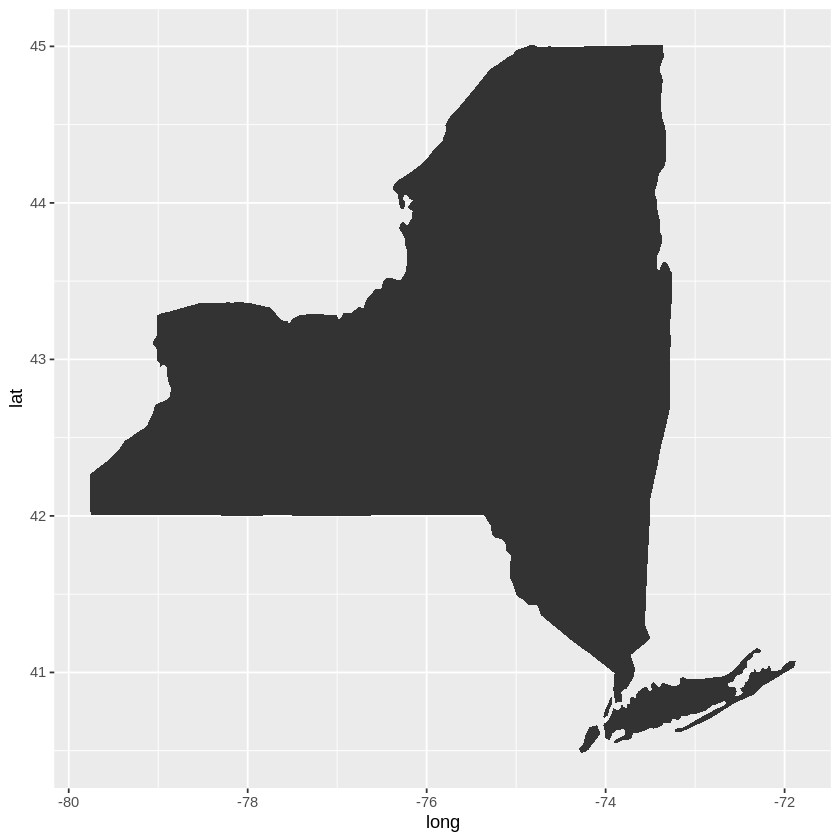

In [123]:
ggplot(ny_counties) + aes(long,lat, group=group) + geom_polygon()

Remember the difference between a **point** and a **polygon** we discussed in class? 

In this case, we’re interested in the latter instead of a single point – we want the **outline** of NYS counties. We can’t see them yet because we haven’t assigned colors to the fill and color arguments – what does each of them do? You’ll know the answer if you run this first:

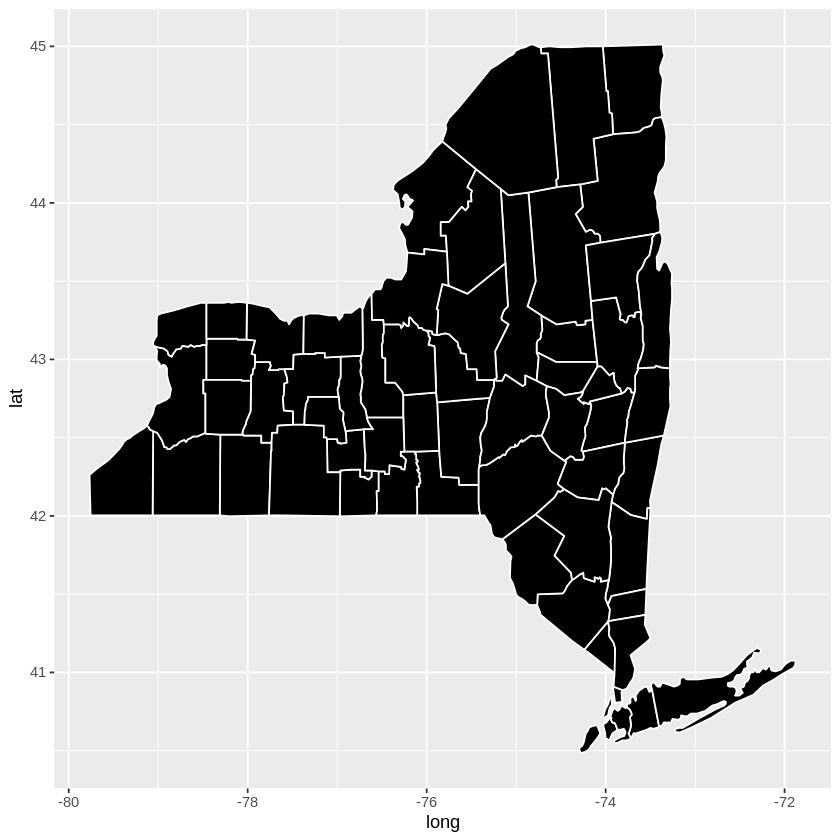

In [124]:
ggplot(ny_counties) + aes(long,lat, group=group) + geom_polygon(fill="black",color="white")

... and then this:

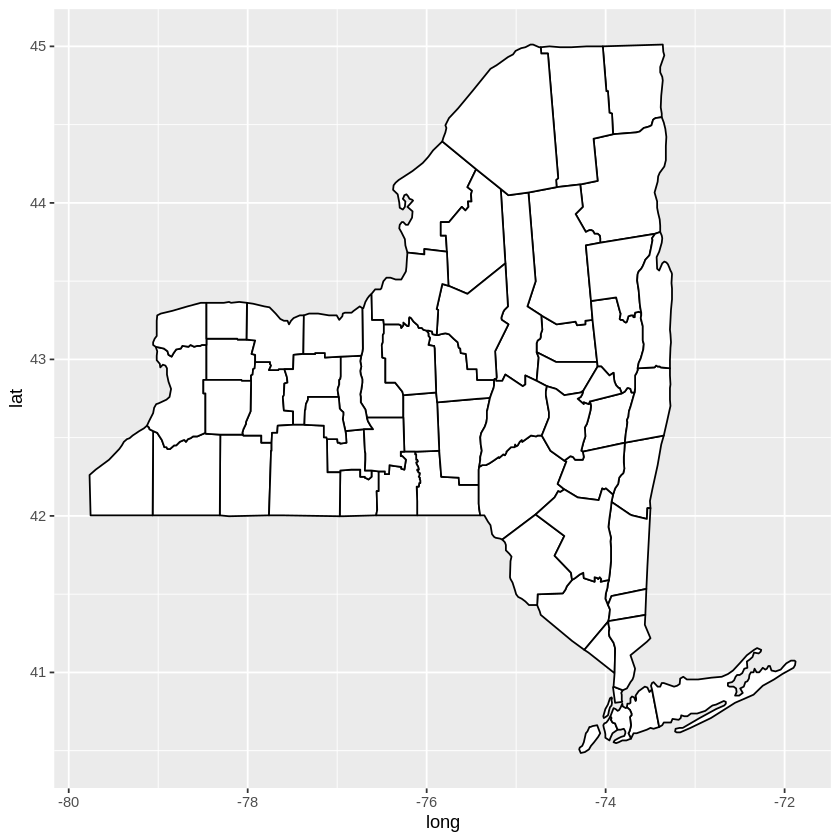

In [125]:
ggplot(ny_counties) + aes(long,lat, group=group) + geom_polygon(fill="white",color="black")

Just staring at a blank map does not amount to much, however. 

Let’s give this map a **data layer** to make it more useful. Let’s read the **nyData.csv** file into R:

In [126]:
nyData <- read_csv("https://ist387.s3.us-east-2.amazonaws.com/lab/nyData.csv")
head(nyData)


── Column specification ────────────────────────────────────────────────────────
cols(
  county = col_character(),
  pop2010 = col_number(),
  pop2000 = col_number(),
  sqMiles = col_number(),
  popDen = col_number()
)




county,pop2010,pop2000,sqMiles,popDen
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
albany,304204,294565,522.80,581.87
allegany,48946,49927,1029.31,47.55
bronx,1385108,1332650,42.10,32900.43
broome,200600,200536,705.77,284.23
cattaraugus,80317,83955,1308.35,61.39
cayuga,80026,81963,691.58,115.71


Let us now **merge ny_counties** and **nyData** into a **common df**.

Wait a minute though – we know to use the **merge()** function, we need to identify a **“key” column** the two original datasets have in common. I don’t see a column name they both share though!

No need to panic – **having no column names in common doesn’t mean there are no common columns** – take a closer look at the **subregion** column in **ny_counties** and **county** in **nyData** – the headers may differ but they both **contain the same info** – **county names**. THIS is our key, we just need a couple extra arguments in the **merge()** function to deal with the difference in key column names:


In [127]:
mergeNY <- merge(ny_counties,nyData, all.x=TRUE,by.x="subregion",by.y="county")

“**x**” stands for **df1** in the **join**, i.e. the first (left-most) df listed in the function (in our case that’s **ny_counties**) and “**y**” – for **df2**, in our case – **nyData**. 

We want to retain **all rows** of **ny_counties** (**all.x=TRUE**), and the **key column** is called **subregion** in **ny_counties** (**by.x=’subregion’**) and **county** in **nyData** (**by.y=’county’**).

What does this line of code do:

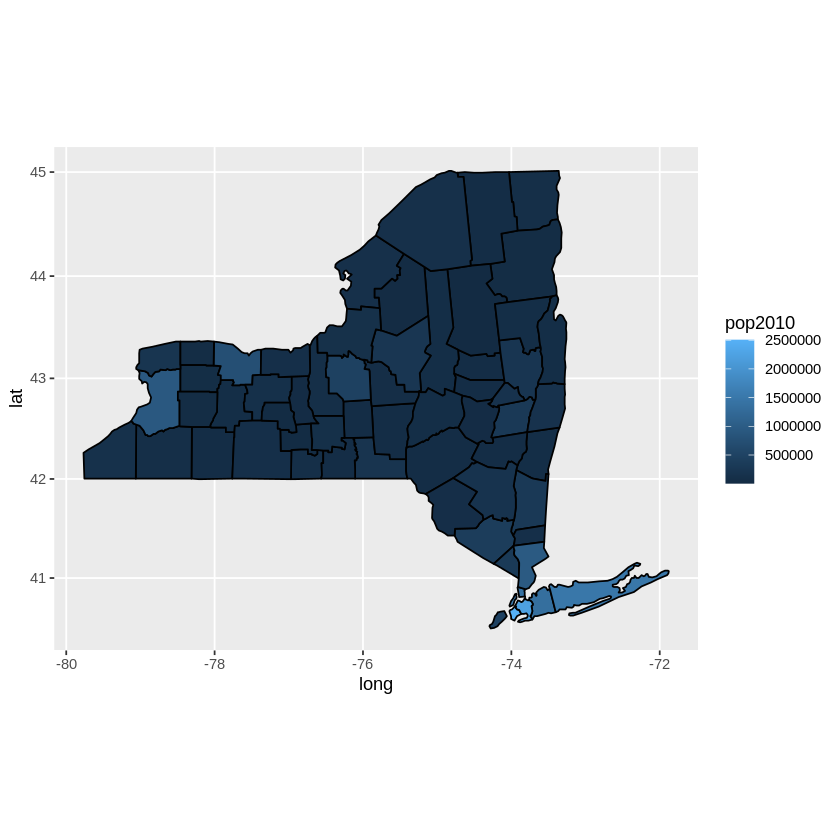

In [128]:
ggplot(mergeNY) + aes(long,lat, group=group) + geom_polygon(aes(fill=pop2010),color="black") + coord_map()  

We just plotted a map of NYS counties shaded depending on their 2010 population. Not bad. 

We can see a slight problem though: Darker shades by default indicate lower values – typically, it’s the other way around. 

We can add an argument to deal with this – feel free to change the colors to any colors you want:

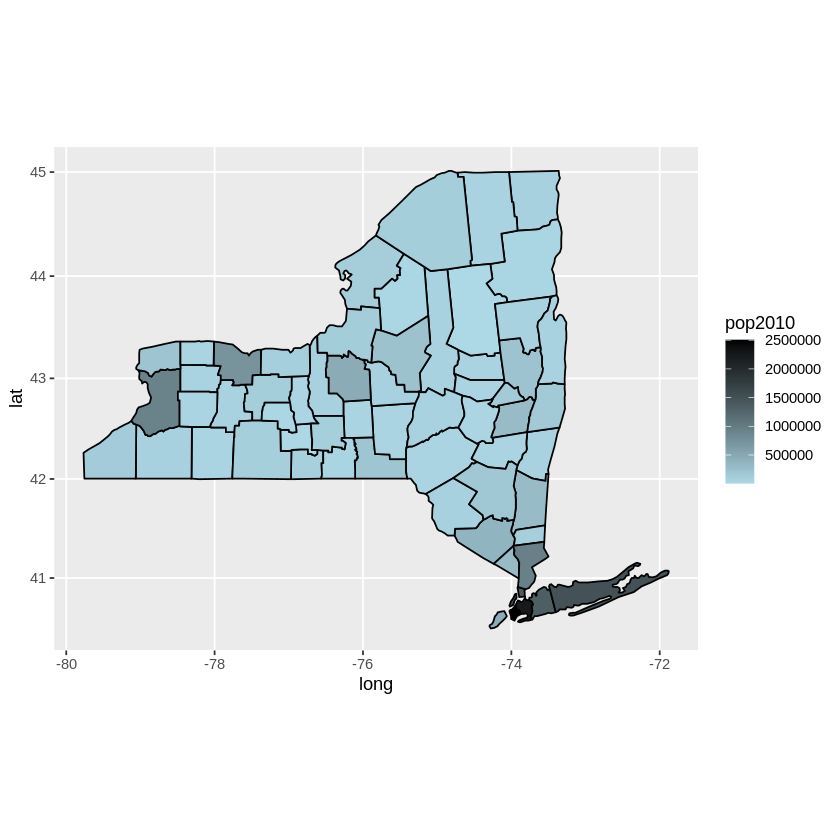

In [129]:
ggplot(mergeNY) + aes(long,lat, group=group) + geom_polygon(aes(fill=pop2010),color="black") + coord_map() + scale_fill_gradient(low='lightblue', high='black')

### Part 2: Merging, Grouping and Plotting Data on Maps (HW) 

I won’t go into details about the part of the code we already practiced in class, but feel free email me if you have any questions.

To complete the homework, in addition to the packages above, you'll also need to library **jsonlite** because some of the datasets come in json format instead of .csv.

First, we'll read in df no. 1:

In [130]:
library(jsonlite)
url="https://ist387.s3.us-east-2.amazonaws.com/data/cities.json"
pop <- jsonlite::fromJSON(url)

Let's inspect the **pop** df:

In [131]:
head(pop)

,city,growth_from_2000_to_2013,latitude,longitude,population,rank,state
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,New York,4.8%,40.71278,-74.00594,8405837,1,New York
2,Los Angeles,4.8%,34.05223,-118.24368,3884307,2,California
3,Chicago,-6.1%,41.87811,-87.62980,2718782,3,Illinois
4,Houston,11.0%,29.76043,-95.36980,2195914,4,Texas
5,Philadelphia,2.6%,39.95258,-75.16522,1553165,5,Pennsylvania
6,Phoenix,14.0%,33.44838,-112.07404,1513367,6,Arizona


It appears that this is a population dataset. If we want to do calculations like calculating the mean, we can use vector math, right? Let's try it with **max()** on the **rank** variable:

In [132]:
max(pop$rank)

[1] "999"

Something isn't right - the **max()** function returns a text string when I can clearly see numbers in that column. Perhaps the values in the column aren't treated as numbers?

Sure enough, you can see right below the column heading that it's formatted as **"chr"** = text/character. Let's fix that and try again:

In [133]:
pop$rank <- as.numeric(pop$rank)
max(pop$rank)

[1] 1000

Let's see which city in the dataset is ranked the lowest, i.e. is the lowest in terms of population:

In [134]:
pop[which.max(pop$rank),]

,city,growth_from_2000_to_2013,latitude,longitude,population,rank,state
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
1000,Panama City,0.1%,30.15881,-85.66021,36877,1000,Florida


You need to do the same transformation for other variables that are treated as just text, if you want to use them in math operations. For example, the **population** column:

In [135]:
pop$population <- as.numeric(pop$population)

We can now proceed to the second step:

#### Merge the population data with the state name data

In [136]:
library(tidyverse)
abbr=read_csv("https://ist387.s3.us-east-2.amazonaws.com/data/states.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  State = col_character(),
  Abbreviation = col_character()
)




To successfully merge the dataframe **pop** with the **abbr** dataframe, we need to identify a **column they have in common** which will serve as the **“key”** to merge on. 

One column both dataframes have is the **state** column. The only problem is the slight column name discrepancy – in **pop**, the column is called **“state”** and in **abbr** – **“State.”** These names need to be reconciled for the **merge()** function to work. This is a way to **rename abbr’s “State” to match the state column in pop** and merge the two dfs:

In [137]:
abbr$state <- abbr$State
dfNew <- merge(pop, abbr, by="state")

Next, we can plot **points** (on top of a map of the US) for each city (we'll need **ggplot2** and **ggmap** for that). Have the **color** represent the **rank**.

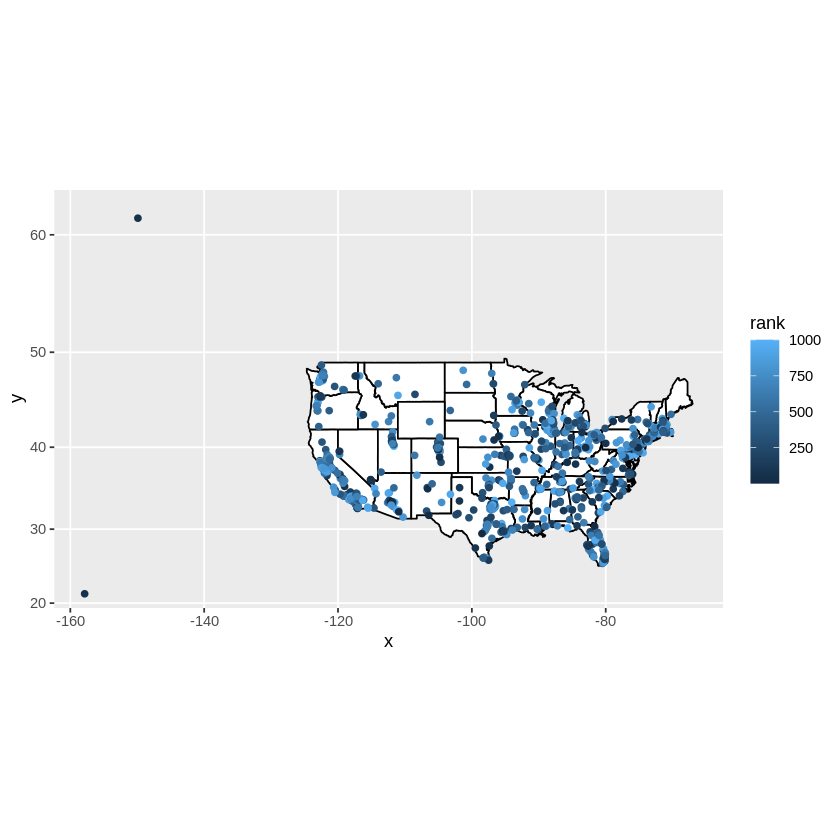

In [138]:
#install.packages('ggmap')
#install.packages('maps')
#install.packages('mapproj')
library(ggplot2)
library(ggmap)
library(maps)
library(mapproj)

us <- map_data("state")
dfNew$state_name <- tolower(dfNew$state)
map1 <- ggplot(dfNew, aes(map_id=state_name))
map1 <- map1 + geom_map(map=us, fill="white", color="black")
map1 <- map1 + expand_limits(x=us$long, y=us$lat)
map1 <- map1 + coord_map()
map1 <- map1 + geom_point(aes(x=longitude,y=latitude, color=rank))
map1

#### Step 3: Use aggregate() to make a dataframe of state-by-state population

Instead of having a bunch of points on a map, we can shade in polygons with the shape of each state. To do that though, we need to "fold up" our dfNew data which is currently at the city level to the state level. One way to do that is by using the aggregate() function which works the same way pivot tables in Excel do.

In [139]:
dfSimple = aggregate(dfNew$rank,
                     by = list(dfNew$state),
                     FUN = length)
dfSimple$name <- dfSimple$Group.1
dfSimple$Group.1 <- NULL
dfSimple$numRankedCities <- dfSimple$x
dfSimple$x <- NULL  

After running the block of code above, we end up with a df with 51 observations (1 for each state and the District of Columbia), where the numRankedCities var represents the number of cities that made the list in each state. E.g., Alabama has 12 cities in the top 1,000, but Alaska only has 1.

Instead of "length," which essentially counts the number of ranked cities in a state, you can use a bunch of other math functions, such as "sum" which calculates the sum of values in a column for each state, etc. 

In [140]:
dfSimple

name,numRankedCities
<chr>,<int>
Alabama,12
Alaska,1
Arizona,25
Arkansas,10
California,212
Colorado,21
Connecticut,15
Delaware,2
District of Columbia,1


We can check out the state with the smallest amount of ranked cities by using subsetting:

In [141]:
dfSimple[which.min(dfSimple$numRankedCities),]

,name,numRankedCities
,<chr>,<int>
2,Alaska,1


We are almost ready to plot this new numRankedCities variable on a map of the US. The only thing we need to do though is remember to make sure the values in the state names column are all lowercase! 

In [142]:
dfSimple$name <- tolower(dfSimple$name)

The following block of code creates a map of the US where states are shaded in depending on the number of ranked cities they have - we can see for instance, that there are more than 200 big cities in the state of Florida.

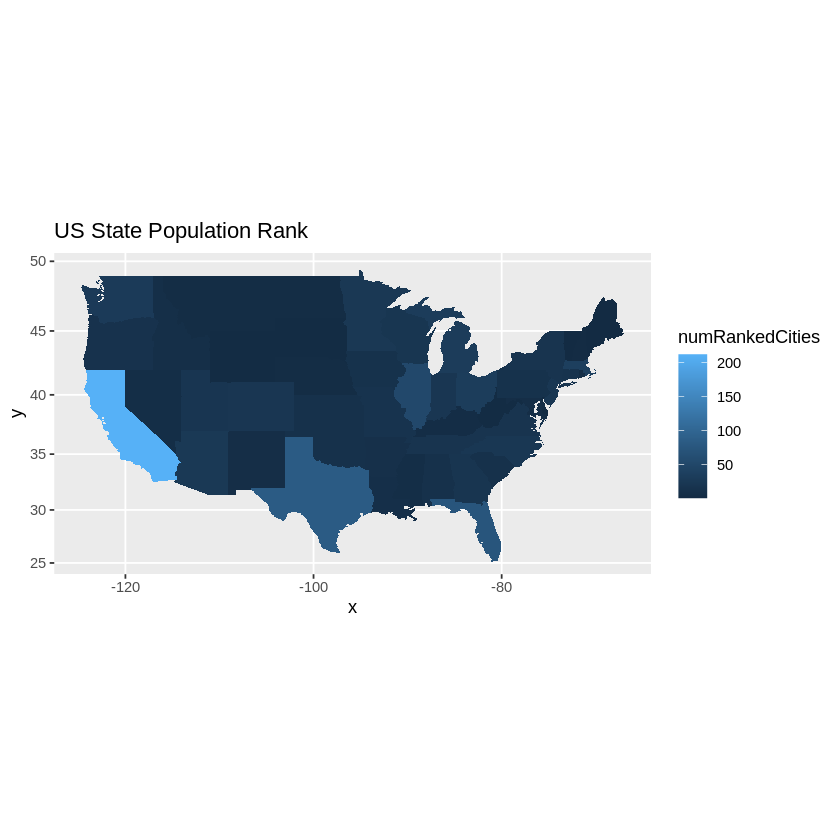

In [143]:
map2 <- ggplot(dfSimple, aes(map_id=name))
map2 <- map2 + geom_map(map=us, aes(fill=numRankedCities))
map2 <- map2 + expand_limits(x=us$long, y=us$lat)
map2 <- map2 + coord_map() + ggtitle("US State Population Rank")
map2